In this notebook, I will attempt to predict Airbnb prices in NYC with this Kaggle dataset. I have never done predictive modeling in Python so here's to attempting to teaching myself. Here's how I will break down this notebook...

>Importing and cleaning the data

>Looking at how different attributes in the dataset affect the price. This includes the location (borough and neighbourhood), type of room, number of reviews, etc...

>Cleaning data based on relevancy for predictive models

>Predictive modeling in Python

Thank you for checking out my work!! Feel free to reach out with any comments, advice, and/or questions!

In [3]:
import os, pandas as pd
path = os.getcwd()
path

'C:\\Users\\yasmi\\Documents'

In [4]:
# in order to read graphs in my noteboook

%matplotlib inline

import matplotlib.pyplot as plt

from matplotlib import style # style lets me customize charts

import matplotlib as mpl

In [151]:
nyc_ab = pd.read_csv(path +'\\AB_NYC_2019.csv')
nyc_ab.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
# Information about the dataset including the shape, datatypes and the first 5 rows

def dfinfo(df):
    print(f'Dateframe shape: {df.shape}')
    print( '\n')
    print(f'Dateframe datatypes: {df.dtypes}')
    print( '\n')
    return df.head(5)
dfinfo(nyc_ab)

Dateframe shape: (48895, 16)


Dateframe datatypes: id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [119]:
#Looking at null values

nyc_ab.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [152]:
#cleaning the data, replacing null values

nyc_ab.name.fillna('NoName', inplace=True)
nyc_ab.host_name.fillna('NoName',inplace=True)
nyc_ab.last_review.fillna(0, inplace=True)
nyc_ab.reviews_per_month.fillna(0, inplace=True)
nyc_ab.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Looking at the price column based on each borough in NYC

In [121]:
nyc_ab.groupby(['neighbourhood_group']).price.describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [122]:
nyc_ab[nyc_ab['price']>1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,0,0.00,1,365
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,0,0.00,1,0
1480,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77516,-73.98573,Entire home/apt,2000,30,59,2016-01-28,0.71,11,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48080,36074198,Luxury apartment 2 min to times square,203565865,Vinícius,Manhattan,SoHo,40.72060,-74.00023,Entire home/apt,1308,2,0,0,0.00,1,179
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,0,0.00,1,222
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,0,0.00,1,270
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,0,0.00,1,349


239 listings are priced at over $1000/night. This means that the properties are very luxorious or there was an error with the data. Nonetheless, we will call them outliers and drop them below

In [153]:
nyc_ab = nyc_ab[nyc_ab['price']<1000]

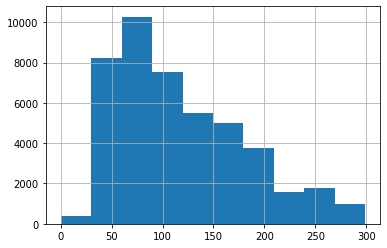

In [124]:
hist_price=nyc_ab['price'][nyc_ab['price']<300].hist()

In [154]:
#Using $300 as the threshold price
nyc_ab = nyc_ab[nyc_ab['price']<300]

In [126]:
# Looking at the average price per night and the range
nyc_ab['price'].describe()

count    44977.000000
mean       116.017520
std         63.095803
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

In [127]:
# Looking at the boroughs -- most listings remain in Brooklyn
nyc_ab['neighbourhood_group'].value_counts()

Brooklyn         19191
Manhattan        18826
Queens            5535
Bronx             1063
Staten Island      362
Name: neighbourhood_group, dtype: int64

In [128]:
# Looking at the neighbourhoods -- most listings remain in Williamsburg
nyc_ab['neighbourhood'].value_counts()

Williamsburg          3653
Bedford-Stuyvesant    3616
Harlem                2556
Bushwick              2430
Upper West Side       1721
                      ... 
Howland Hook             2
Richmondtown             1
Rossville                1
Willowbrook              1
New Dorp                 1
Name: neighbourhood, Length: 219, dtype: int64

In [129]:
bprice = nyc_ab.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)
bprice

neighbourhood_group
Manhattan        140.092000
Brooklyn         103.345214
Queens            87.649684
Staten Island     87.488950
Bronx             75.858890
Name: price, dtype: float64

Here, we can see that the most expensiveplace to stay is in Manhattan, while the least expensive place to stay is in the Bronx.

In [130]:
roomDist = nyc_ab.groupby(['neighbourhood_group','room_type']).price.mean().sort_values(ascending=False)
roomDist

neighbourhood_group  room_type      
Manhattan            Entire home/apt    174.442291
Brooklyn             Entire home/apt    144.274321
Queens               Entire home/apt    128.864594
Staten Island        Entire home/apt    118.933735
Bronx                Entire home/apt    109.983287
Manhattan            Private room        96.265200
                     Shared room         74.441558
Brooklyn             Private room        70.098767
Queens               Private room        65.522401
Staten Island        Private room        61.021390
Bronx                Private room        59.482171
Staten Island        Shared room         57.444444
Brooklyn             Shared room         47.421951
Bronx                Shared room         47.254237
Queens               Shared room         45.678756
Name: price, dtype: float64

In [131]:
#visualizing what the data is telling us

import numpy as np
import seaborn as sns
from scipy import stats

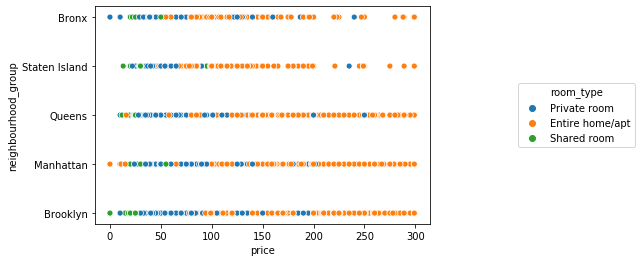

In [132]:
plot = sns.scatterplot(x='price', y='neighbourhood_group', hue='room_type',data=nyc_ab)
plot.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plot

The above scatterplot shows the distribution of room types based on the price and borough. We can infer that:
>Queens, Manhattan, and Brooklyn tend to have more listings with price per night > $200.

>Entire homes/apartments are going to be the most expensive options, and shared rooms are going to be the least expensive options.


In [133]:
nyc_ab.groupby(['neighbourhood_group','room_type']).price.mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt    109.983287
                     Private room        59.482171
                     Shared room         47.254237
Brooklyn             Entire home/apt    144.274321
                     Private room        70.098767
                     Shared room         47.421951
Manhattan            Entire home/apt    174.442291
                     Private room        96.265200
                     Shared room         74.441558
Queens               Entire home/apt    128.864594
                     Private room        65.522401
                     Shared room         45.678756
Staten Island        Entire home/apt    118.933735
                     Private room        61.021390
                     Shared room         57.444444
Name: price, dtype: float64

Based on each borough, the above query shows the average price per night for each type of room.
>This can be used as data for potential clients as they try to find the best deal for their budget.

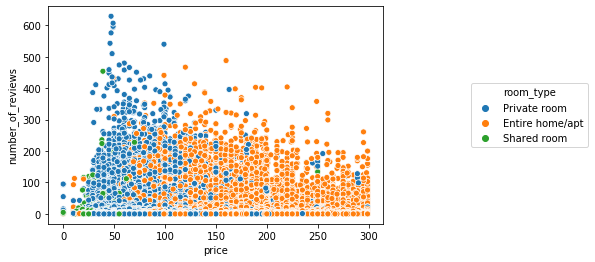

In [135]:
## Let's see if the number of reviews has an impact on the price

revP = sns.scatterplot(x='price', y='number_of_reviews', hue='room_type',data=nyc_ab)
revP.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
revP

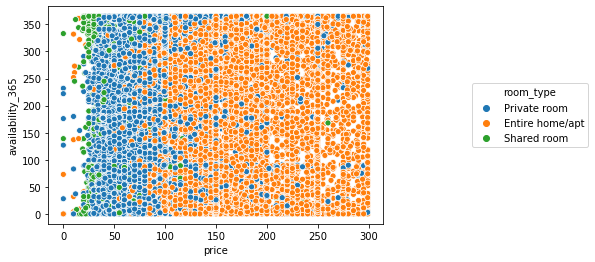

In [136]:
## Let's see if the availability has an impact on the price

AvailP = sns.scatterplot(x='price', y='availability_365', hue='room_type',data=nyc_ab)
AvailP.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
AvailP


In [155]:
#Since the id and host_name are seen as useless or noisy columns for our predictive model, I am going to drop those columns
nyc_ab = nyc_ab.drop(columns = ['id','host_name'])

In [161]:
nyc_ab.dtypes

name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Now, to attempt to create predictive models using python...!

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(nyc_ab, nyc_ab['price'], test_size=0.3)

In [186]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Use only one feature
nyc_ab_X = nyc_ab['price']
nyc_ab_y = nyc_ab['neighbourhood_group']

# Split the data into training/testing sets
nyc_ab_X_train = nyc_ab_X[:-20]
nyc_ab_X_test = nyc_ab_X[-20:]

# Split the targets into training/testing sets
nyc_ab_y_train = nyc_ab_y[:-20]
nyc_ab_y_test = nyc_ab_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(nyc_ab_X_train, nyc_ab_y_train)

# Make predictions using the testing set
nyc_ab_y_pred = regr.predict(nyc_ab_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(nyc_ab_y_test, nyc_ab_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(nyc_ab_y_test, nyc_ab_y_pred))

# Plot outputs
plt.scatter(nyc_ab_X_test, nyc_ab_y_test,  color='black')
plt.plot(nyc_ab_X_test, nyc_ab_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[149 225 150 ... 260 170  50].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.